# **<font color="black">Анализ результатов A/B-теста</font>**</font>

# **<font color="black">Описание проекта</font>**:</font>
Вы — аналитик крупного интернет-магазина.  
Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.  
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.  

# **Описание данных**:  

Данные для первой части:    

Файл датасет1.  

•	Hypothesis — краткое описание гипотезы;  
•	Reach — охват пользователей по 10-балльной шкале;  
•	Impact — влияние на пользователей по 10-балльной шкале;  
•	Confidence — уверенность в гипотезе по 10-балльной шкале;  
•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

Данные для второй части:    

Файл датасет2.  

•	transactionId — идентификатор заказа;  
•	visitorId — идентификатор пользователя, совершившего заказ;  
•	date — дата, когда был совершён заказ;  
•	revenue — выручка заказа;  
•	group — группа A/B-теста, в которую попал заказ.  

Файл датасет3.  

•	date — дата;  
•	group — группа A/B-теста;  
•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста.  

# **Часть 1. Предообработка данных**:  

1.1. Загрузка библиотек, датафреймов, приведение данных к нужным форматам.  

# **Часть 2. Приоритизация гипотез**:  

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.  

Задача:  

2.1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета;  
2.2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета;  
2.3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.  

# **Часть 3. Анализ A/B-тест**:  

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.  

3.1. Проверка данных на корректность.  

Задача:  

3.2. Проанализируйте A/B-тест:  

3.2.1. Перемеинование столбцов датафреймов.    

3.2.2. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.  

3.2.3. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.  

3.2.4. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.  

3.2.5. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.  

3.2.6.	Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.  

3.2.7.	Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.  

3.2.8.	Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.  

3.2.9.	Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.  

3.2.10.	Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.  

3.2.11.	Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.  

3.2.12.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.  

3.2.13.	Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.  

3.2.14.	Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.  

3.2.15.	Примите решение по результатам теста и объясните его.  

Варианты решений:  

1. Остановить тест, зафиксировать победу одной из групп.  
2. Остановить тест, зафиксировать отсутствие различий между группами.  
3. Продолжить тест.  

Часть 4. Общий вывод.  

# **Часть 1. Предообработка данных**:  

1.1. Загрузка библиотек, датафреймов, приведение данных к нужным форматам:  

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None # для метода display()
pd.set_option('display.max_colwidth', -1)
import warnings
warnings.filterwarnings('ignore') # отключу предупреджения Pandas
import scipy.stats as stats

Загрузим данные в переменные:

Hypothesis

In [2]:
hypothesis = pd.read_csv('датасет1')

Orders

In [3]:
orders = pd.read_csv('датасет2')

Visitors

In [4]:
visitors = pd.read_csv('датасет3')

Посмотрим на датафреймы глазами:

Датафрейм "Hypothesis"

In [5]:
display(hypothesis.head(9))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В Датафрейм "Hypothesis", все ОК.  
Пропусков и дубликатов нет.  

Датафрейм "Orders"

In [6]:
display(orders.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропусков нет, преобразуем тип данных в дату и время:

In [8]:
orders['date'] = pd.to_datetime(orders['date'], format= '%Y.%m.%d')

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Проверю датафрейм на предмет наличия дубликатов.  

In [10]:
orders.duplicated().sum()

0

Дубликатов не обнаружено.  

Датафрейм "visitors"

In [11]:
display(visitors.head(5))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков нет, преобразуем тип данных в дату и время:

In [13]:
visitors['date'] = pd.to_datetime(visitors['date'], format= '%Y.%m.%d')

In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверю датафрейм на предмет наличия дубликатов.  

In [15]:
visitors.duplicated().sum()

0

Предообработка датафреймов завершена

*Промежуточный вывод по Части 1. Предообработка данных*:  

В работу пришли 3 датафрейма - Hypothesis, Orders и Visitors.  

Датафрейм Hypothesis:  

 - 9 строк, 5 столбцов, пропусков нет, дубликатов нет.  Вероятно, можно было бы как - то покороче сформулировать гипотезы.  
 
Датафрейм Orders:  

- 1197 строк, 5 столбцов, пропусков нет, дубликатов нет. Преобразовал дату.  

Датафрейм Visitors:  

- 62 строки, 3 столбца, пропусков нет, дубликатов нет. Преобразовал дату.  

В целом, данные выглядят качественными. Немного смущает маленькие размеры датафреймов.  

# **Часть 2. Приоритизация гипотез**:

2.1. Применим фреймворк ICE для приоритизации гипотез, отсортируем их по убыванию приоритета:  

In [16]:
hypothesis['priority_ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis = hypothesis.round(2).sort_values(by='priority_ICE')
hypothesis.index = range(len(hypothesis))
hypothesis_ICE = hypothesis[['Hypothesis', 'priority_ICE']].reset_index()
hypothesis_ICE.columns = ['ICE_order', 'Hypothesis', 'priority_ICE']
hypothesis_ICE['ICE_order'] += 1

In [17]:
display(hypothesis_ICE)

,ICE_order,Hypothesis,priority_ICE
0,1,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00
1,2,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
2,3,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,4,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
4,5,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
5,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
6,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
7,8,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
8,9,"Запустить акцию, дающую скидку на товар в день рождения",16.20


2.2. Применим фреймворк RICE для приоритизации гипотез, отсортируем их по убыванию приоритета:  

In [18]:
hypothesis['priority_RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis = hypothesis.round(2).sort_values(by='priority_RICE')
hypothesis.index = range(len(hypothesis))
hypothesis_RICE = hypothesis[['Hypothesis', 'priority_RICE']].reset_index()
hypothesis_RICE.columns = ['RICE_order', 'Hypothesis', 'priority_RICE']
hypothesis_RICE['RICE_order'] += 1

In [19]:
display(hypothesis_RICE)

,RICE_order,Hypothesis,priority_RICE
0,1,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0
1,2,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
2,3,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
4,5,"Запустить акцию, дающую скидку на товар в день рождения",16.2
5,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
6,7,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
7,8,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
8,9,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0


2.3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE:  

In [20]:
df_common = hypothesis_ICE.merge(hypothesis_RICE, on='Hypothesis').sort_values(by='priority_ICE', ascending=False)
df_common = df_common[['Hypothesis', 'ICE_order', 'RICE_order']]
df_common['Short_name'] = ['Скидка_ДР', 'Добавить_2_канала_трафика', 'Подписка', 'Баннеры_акций', 'Рекомендации', 
                            'Доставка', 'Отзывы', 'Изменить_категории', 'Цвет_фон']

In [21]:
display(df_common)

,Hypothesis,ICE_order,RICE_order,Short_name
8,"Запустить акцию, дающую скидку на товар в день рождения",9,5,Скидка_ДР
7,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",8,7,Добавить_2_канала_трафика
6,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",7,9,Подписка
5,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",6,6,Баннеры_акций
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",5,8,Рекомендации
3,"Запустить собственную службу доставки, что сократит срок доставки заказов",4,3,Доставка
2,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,Отзывы
1,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",2,4,Изменить_категории
0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,1,Цвет_фон


Визуализируем:  

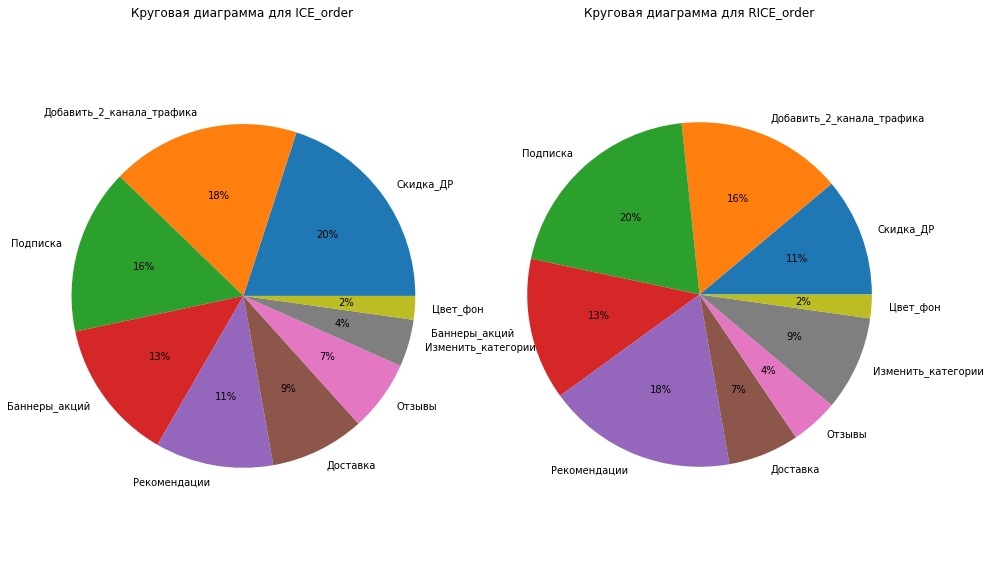

In [22]:
vals = [9, 8, 7, 6, 5, 4, 3, 2, 1]
labels = ['Скидка_ДР', 'Добавить_2_канала_трафика', 'Подписка', 'Баннеры_акций', 'Рекомендации', 'Доставка', 'Отзывы', 'Изменить_категории', 'Цвет_фон']
fig, ax = plt.subplots(1,2, figsize = (15,10))
ax[0].pie(vals, labels=labels, autopct = '%1.0f%%')
ax[0].set_title('Круговая диаграмма для ICE_order')
ax[0].axis('equal');


vals = [5, 7, 9, 6, 8, 3, 2, 4, 1]
labels = ['Скидка_ДР', 'Добавить_2_канала_трафика', 'Подписка', 'Баннеры_акций', 'Рекомендации', 'Доставка', 'Отзывы', 'Изменить_категории', 'Цвет_фон']


ax[1].pie(vals, labels=labels, autopct = '%1.0f%%')
ax[1].set_title('Круговая диаграмма для RICE_order')
ax[1].axis('equal');

Вывод:  

Параметр охвата (Reach), использующийся в методе RICE изменил всю приоритетность, полученную по методу ICE:

 - Без учета охвата на первом месте идет акция со скидкой на День Рождения, но параметр Reach понизил приоритет этой акции, т.к., её охват минимальный (по сравнению с другими гипотезами увеличения выручки);  
 
 - Аналогичная ситуация и с гипотезой о добавлении дополнительных каналов трафика, с организацией своей службы доставки и с идеей о добавлении страницы отзывов;   
 
 - Без изменений осталась рейтинговая позиция гипотез о добавлении баннеров с актуальными акциями на главную страницу и идея с изменением цвета фона главной страницы;    
 
- Выросли в рейтинге (стали более приоритетными) RICE (по сравнению с ICE) гипотеза о добавлении формы подписки на все основные страницы ресурса, о добавлении блоков рекомендаций товаров и предложение об изменении структуры категорий.  

# **Часть 3. Анализ A/B-теста**:  

3.1. Проверка данных на корректность.  

#Есть основания полагать, что могут быть некорректные данные.  

Отсортируем датафрейм orders по visitorId.  

In [23]:
display(orders.sort_values(by = 'visitorId', ascending = False))

,transactionId,visitorId,date,revenue,group
974,836739159,4283872382,2019-08-22,3806,B
392,3796325351,4281247801,2019-08-25,2640,B
576,2724331495,4279090005,2019-08-04,6716,B
886,51443164,4278982564,2019-08-05,24744,A
682,1216533772,4266935830,2019-08-29,78990,B
...,...,...,...,...,...
233,797272237,11685486,2019-08-23,6201,A
703,4293855558,8300375,2019-08-07,1790,A
71,3679129301,8300375,2019-08-01,10510,B
573,1887336629,6958315,2019-08-04,1490,B


Выявились пользователи, состоящие в обеих группах тестирования, например пользователь с visitorId: 8300375.    
Значит, они совершили более одной транзакции, т.к. пропусков в датафрейме нет.  

Посмотрю на самых "активных" пользователей - совершивших более одной покупки:  

In [24]:
activ_users = orders.groupby(['visitorId', 'group']).size().reset_index()
activ_users.columns = ['visitorId', 'group', 'count']
activ_users = activ_users.query('count > 1').sort_values(by='visitorId')
activ_users.head()

,visitorId,group,count
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
94,366673373,A,2
104,393266494,B,2


Поскольку датафрейм не большой, выведу всех пользователей, которые совершили более одной операции:   

In [25]:
print(activ_users.to_string())

       visitorId group  count
45    199603092   A     4    
58    237748145   A     4    
63    249864742   B     3    
94    366673373   A     2    
104   393266494   B     2    
108   406208401   B     2    
122   457167155   B     3    
138   522292794   B     2    
158   611059232   A     3    
177   678354126   A     2    
196   759473111   A     2    
311   1230306981  A     3    
312   1230306981  B     2    
324   1294878855  A     2    
355   1404560065  B     2    
357   1404934699  B     2    
411   1614305549  A     3    
413   1617417821  A     2    
418   1637811943  B     2    
427   1668030113  B     2    
444   1738359350  B     2    
451   1772171838  A     2    
500   1985475298  B     2    
507   2025197455  B     2    
511   2038680547  A     5    
512   2038680547  B     3    
517   2044997962  B     2    
528   2096506107  B     2    
530   2108163459  A     3    
561   2232111114  A     2    
581   2306096143  A     2    
591   2366521417  B     2    
595   2378

Если посмотреть "на глазок", то пользователи с visitorId: 1230306981, 2038680547, 2378935119, 2458001652, 4256040402 фигурируют и в группе "A" и в группе "B", но где пользователь visitorId: 8300375, которого мы видели в самом начале?  

В целом - можно предположить, что это какие-нибудь тестовые пользователи.  

Например, человек, который заводил тест, может сам себя перекинуть из одной группы в другую, чтобы убедиться, что все работает как надо. Либо же проблема в системе сплитования аудитории.  

Проверим пользователей, состоящих в группах "A" и "B" кодом, в соответствии с комментариями ревьюера и для "очистки совести".  

Посмотрим сколько всего уникальных пользователей в датафрейме Orders:  

In [26]:
print('Количество уникальных пользователей во всем датафрейме "Orders":', len(orders['visitorId'].unique()))

Количество уникальных пользователей во всем датафрейме "Orders": 1031


Пользователи из группы "А":  

In [27]:
orders_A = orders.loc[orders['group'] == 'A']

In [28]:
orders_A.head(5)

,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
10,3649131742,879864040,2019-08-15,4008,A
12,2809384911,3213223594,2019-08-15,7370,A


Создам список уникальных значений visitorId из датафрейма orders_A:  

In [29]:
orders_A_unique = orders_A['visitorId'].unique()

In [30]:
print('Количество уникальных пользователей, состоящих в группе "А":', len(orders_A_unique))

Количество уникальных пользователей, состоящих в группе "А": 503


In [31]:
#print(orders_A_unique) # печатать не стал - очень большой массив

Аналогично сделаю для пользователей из группы "B":  

Пользователи из группы "B":  

In [32]:
orders_B = orders.loc[orders['group'] == 'B']

In [33]:
orders_B.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [34]:
orders_B_unique = orders_B['visitorId'].unique()

In [35]:
print('Количество уникальных пользователей, состоящих в группе "B":', len(orders_B_unique))

Количество уникальных пользователей, состоящих в группе "B": 586


In [36]:
#print(orders_B_unique) # печатать не стал - очень большой массив

Получилось 2 списка, в одном из которых, только пользователи из группы "А", а во втором, соотвественно из группы "В".  

Пользователей группы "А" 503, пользователей группы "В" 586, то есть в сумме 1089, а всего в датафрейме 1031 уникальный пользователь, то есть есть 58 пользователей, которые попали и в ту и другую группу, что существенно, больше, чем, первоначально, найденных 5.

Найдем повторяющиеся значения в списках, для этого напишем цикл, который будет брать первый элемент первого списка (внешний цикл for) и последовательно сравнивать его с каждым элементом второго списка (вложенный цикл for). В случае совпадения значений элемент добавляется в третий список orders_A_B.  

Команда break служит для выхода из внутреннего цикла, так как в случае совпадения дальнейший поиск при данном значении i бессмыслен.  

In [37]:
orders_A_B = []
for i in orders_A_unique:
    for j in orders_B_unique:
        if i == j:
            orders_A_B.append(i)
            break

print(orders_A_B)

[4069496402, 199603092, 3803269165, 2378935119, 237748145, 4256040402, 2038680547, 1738359350, 2458001652, 3891541246, 2716752286, 3656415546, 2686716486, 2954449915, 2927087541, 3234906277, 457167155, 2579882178, 3957174400, 1648269707, 2780786433, 818047933, 2044997962, 1959144690, 3202540741, 1333886533, 351125977, 3951559397, 393266494, 3984495233, 4120364173, 4266935830, 1230306981, 1294878855, 1614305549, 8300375, 477780734, 1668030113, 3717692402, 3766097110, 3941795274, 471551937, 1316129916, 1801183820, 1602967004, 2587333274, 2600415354, 232979603, 3972127743, 1404934699, 276558944, 3062433592, 2654030115, 3963646447, 4186807279, 2712142231, 2949041841, 963407295]


А вот и наш пользователь с visitorId: 8300375 и остальные 57 пользователей, попавших в обе группы.  

In [38]:
print('Количество пользователей, состоящих в группе "А" и в группе "В":', len(orders_A_B))

Количество пользователей, состоящих в группе "А" и в группе "В": 58


"Анализ глазами" оказался некачественным, код показал, что таких пользователей намного, намного больше.  
При других обстоятельствах, возможно, следовало бы вернуть датафрейм на доработку или обсудить с коллегами этот вопрос.  

Передам этих пользователей в словарь:  

In [39]:
fake_activ_users = orders_A_B

In [40]:
fake_orders = orders.query('visitorId in @fake_activ_users')
print('Количество строк в датафрейме orders по этим пользователям: {}'.format(fake_orders.shape[0]))
fake_orders.head()

Количество строк в датафрейме orders по этим пользователям: 181


,transactionId,visitorId,date,revenue,group
2,2961555356,4069496402,2019-08-15,400,A
20,2904772834,963407295,2019-08-15,300,B
23,4252514150,351125977,2019-08-15,15185,B
24,1162046357,3234906277,2019-08-15,7555,B
26,2223239646,199603092,2019-08-15,3488,A


Посмотрим, сколько заказов они сделали, на какую сумму: 

In [41]:
fake_orders_grouped = (fake_orders.groupby(['visitorId', 'group', 'date']).agg({'transactionId': 'nunique', 'revenue': 'sum'}))

In [42]:
print('Количество транзакций, совершенных fake_orders_grouped:', fake_orders_grouped['transactionId'].count())

Количество транзакций, совершенных fake_orders_grouped: 170


In [43]:
print('Общее количество транзакций:', orders['transactionId'].count())

Общее количество транзакций: 1197


In [44]:
print('Сумма на которую "приобрели" fake_orders_grouped:', fake_orders_grouped['revenue'].sum())

Сумма на которую "приобрели" fake_orders_grouped: 1558935


In [45]:
print('Общая сумма покупок:', orders['revenue'].sum())

Общая сумма покупок: 9992563


Пользователи, состоящие в группах "А" и "В" проявляли довольно высокую активность, что впрочем составляет:  

In [46]:
print('Доля fake_orders в общем количестве транзакций: {:.2%}'.format(fake_orders_grouped['transactionId'].count()
                                                          / orders['transactionId'].count()
                                                         ))

Доля fake_orders в общем количестве транзакций: 14.20%


In [47]:
print('Доля fake_orders в общей сумме транзакций: {:.2%}'.format(fake_orders_grouped['revenue'].sum()
                                                          / orders['revenue'].sum()
                                                         ))

Доля fake_orders в общей сумме транзакций: 15.60%


Как выяснилось, доля таких пользователей в количестве транзакций, и в выручке очень велика.  
Эти пользователи, попали также в датафрейм Visitors, в виде количества посещений, следует их отттуда удалить.  

IMHO - с таким количеством транзакций и сумм, совершенных пользователями из fake_orders, датафреймы, надо, однозначно, отправлять на доработку.  

Сгруппируем этих пользователей по дням и по количеству транзакций в этот день:  

In [48]:
fake_orders_grouped_date_transactionId = (fake_orders.groupby(['date']).agg({'transactionId': 'count'}))

In [49]:
display(fake_orders_grouped_date_transactionId.head())

,transactionId
date,
2019-08-01,5
2019-08-02,2
2019-08-03,2
2019-08-04,8
2019-08-05,5


In [50]:
print('Количество посещений в исходном датафрейме Visitors:', visitors['visitors'].sum())

Количество посещений в исходном датафрейме Visitors: 37652


Объединим датафреймы orders и visitors по колонке date.  

In [51]:
visitors = visitors.merge(fake_orders_grouped_date_transactionId, on='date', how='left') 

In [52]:
display(visitors.head())

,date,group,visitors,transactionId
0,2019-08-01,A,719,5
1,2019-08-02,A,619,2
2,2019-08-03,A,507,2
3,2019-08-04,A,717,8
4,2019-08-05,A,756,5


Добавим новый столбец - в котором будет рассчитана разница между количеством визитов и количестовм транзакицй совершенных пользователями из fake_orders_grouped_date_transactionId.  

In [53]:
visitors['visitors_clean'] = (visitors['visitors'] - visitors['transactionId'])

In [54]:
display(visitors.head())

,date,group,visitors,transactionId,visitors_clean
0,2019-08-01,A,719,5,714
1,2019-08-02,A,619,2,617
2,2019-08-03,A,507,2,505
3,2019-08-04,A,717,8,709
4,2019-08-05,A,756,5,751


Появилось много NaN, поскольку датафрейм fake_orders_grouped_date_transactionId, значительно длиннее, чем датафрейм visitors, заменю NaN на "0".

In [55]:
visitors['transactionId'] = visitors['transactionId'].fillna(0)

In [56]:
visitors['visitors_clean'] = (visitors['visitors'] - visitors['transactionId'])

In [57]:
display(visitors.head())

,date,group,visitors,transactionId,visitors_clean
0,2019-08-01,A,719,5,714
1,2019-08-02,A,619,2,617
2,2019-08-03,A,507,2,505
3,2019-08-04,A,717,8,709
4,2019-08-05,A,756,5,751


In [58]:
visitors = visitors.drop(['visitors', 'transactionId'], axis=1)

In [59]:
display(visitors.head())

,date,group,visitors_clean
0,2019-08-01,A,714
1,2019-08-02,A,617
2,2019-08-03,A,505
3,2019-08-04,A,709
4,2019-08-05,A,751


In [60]:
visitors = visitors.rename(columns={'visitors_clean':'visitors'})

In [61]:
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,714
1,2019-08-02,A,617
2,2019-08-03,A,505
3,2019-08-04,A,709
4,2019-08-05,A,751


In [62]:
visitors['visitors'] = visitors['visitors'].astype('int64')

In [63]:
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,714
1,2019-08-02,A,617
2,2019-08-03,A,505
3,2019-08-04,A,709
4,2019-08-05,A,751


In [64]:
print('Количество посещений в очищенном датафрейме Visitors:', visitors['visitors'].sum())

Количество посещений в очищенном датафрейме Visitors: 37290


В первоначальном датафрейме Visitors количество визитов было 37652, в очищенном 37290, т.е. были удалены 362 записи или 0,96% от исходного датафрейма.  

Убрал количество посещений пользователей, состоящих в обеих группах, из датафрейма "Visitors", однако, эти пользователи, остались в датафрейме "Orders", предыдущим кодом, мы их, только нашли и посчитали, оценили "масштатбы бедствия".  
Теперь их следует удалить:  

In [65]:
orders = orders.loc[~orders['visitorId'].isin([4069496402, 199603092, 3803269165, 2378935119, 237748145, 4256040402, 2038680547, 1738359350, 2458001652, 3891541246, 2716752286, 3656415546, 2686716486, 2954449915, 2927087541, 3234906277, 457167155, 2579882178, 3957174400, 1648269707, 2780786433, 818047933, 2044997962, 1959144690, 3202540741, 1333886533, 351125977, 3951559397, 393266494, 3984495233, 4120364173, 4266935830, 1230306981, 1294878855, 1614305549, 8300375, 477780734, 1668030113, 3717692402, 3766097110, 3941795274, 471551937, 1316129916, 1801183820, 1602967004, 2587333274, 2600415354, 232979603, 3972127743, 1404934699, 276558944, 3062433592, 2654030115, 3963646447, 4186807279, 2712142231, 2949041841, 963407295])]

Посмотрим еще раз на датафреймы с которыми будем, дальше работать:  

In [66]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [67]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ KB


Предообработка данных завершена, приступаем ко основной части задания.  

##*Наблюдение:  

Есть данные некорректные - очевидные ошибки, баги в датафреймах, например, когда, дата покупки раньше даты посещения сайта или, как в нашем случае, когда пользователи попали в обе группы тестирования.  

А есть аномальные значения. Это не значит, что это фейк, просто по единичным пользователям/покупкам, не следует делать выводы на весь датафрейм, при этом, особенно при одинаковых транзакционных/логистических издержках, исследование этих "белых лебедей", может привести к интересным инсайтам.  *

3.2. Проанализируем A/B-тест:  

3.2.1. Перемеинование столбцов датафреймов:  

Посмотрю еще раз на датафреймы:  

In [68]:
list(orders)

['transactionId', 'visitorId', 'date', 'revenue', 'group']

In [69]:
list(visitors)

['date', 'group', 'visitors']

Перемеименовываем столбцы в датафрейме Orders: 

Столбцы таблицы с заказами (orders):  
- orderId — идентификатор заказа;  
- userId — идентификатор пользователя, совершившего заказ;  
- group — группа A/B-теста;  
- revenue — выручка заказа;  
- date — дата заказа.  

In [70]:
orders.columns = ['orderId', 'userId', 'date', 'revenue', 'group']

In [71]:
list(orders)

['orderId', 'userId', 'date', 'revenue', 'group']

В датафрейме visitors все ОК, столбцы имеют правильные названия.  

3.2.2. Построим график кумулятивной выручки по группам:  

Создадим массив уникальных пар значений дат и групп теста:  

In [72]:
datesGroups = orders[['date','group']].drop_duplicates()

Получим агрегированные кумулятивные по дням данные о заказах:  

In [73]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'orderId' : pd.Series.nunique, 'userId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазин:  

In [74]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия:  

In [75]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [76]:
display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,714
1,2019-08-01,B,17,17,59758,708
2,2019-08-02,A,42,36,234381,1331
3,2019-08-02,B,40,39,221801,1287
4,2019-08-03,A,66,60,346854,1836


Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:  

In [77]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

Создадим датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:  

In [78]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Построим график выручки группы А:  

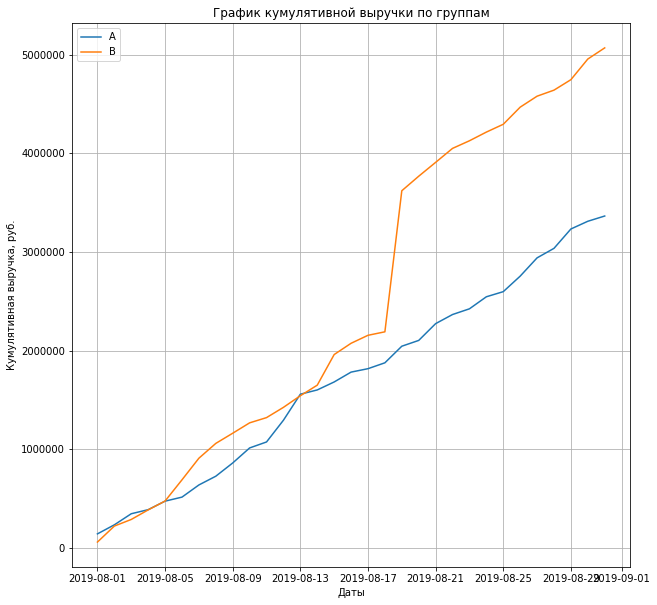

In [79]:
# Строим график выручки группы А
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Даты')
plt.ylabel('Кумулятивная выручка, руб.')
plt.grid()
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid() 
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.  
В течение всего периода график кумулятивной выручки группы B лежит выше, чем график кумулятивной выручки группы A.
Получается, что пользователи, посещающие сайт в версии "B", приносят больше денег.  

3.2.3. Построим график кумулятивного среднего чека по группам -  — разделим кумулятивную выручку на кумулятивное число заказов: 

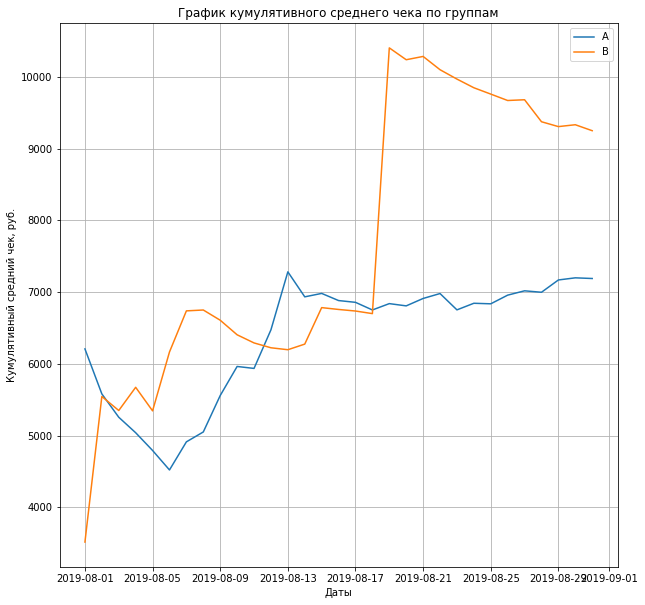

In [80]:
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Даты')
plt.ylabel('Кумулятивный средний чек, руб.')
plt.grid()
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.legend();

На большей части графика средний чек по группе B выше и даже, значительно выше, чем чек по группе A.  
После 18 августа произошел резкий скачок у группы B.  

3.2.4. Построим график относительного изменения кумулятивного среднего чека группы B к группе A:  

Добавим горизонтальную ось методом axhline().  

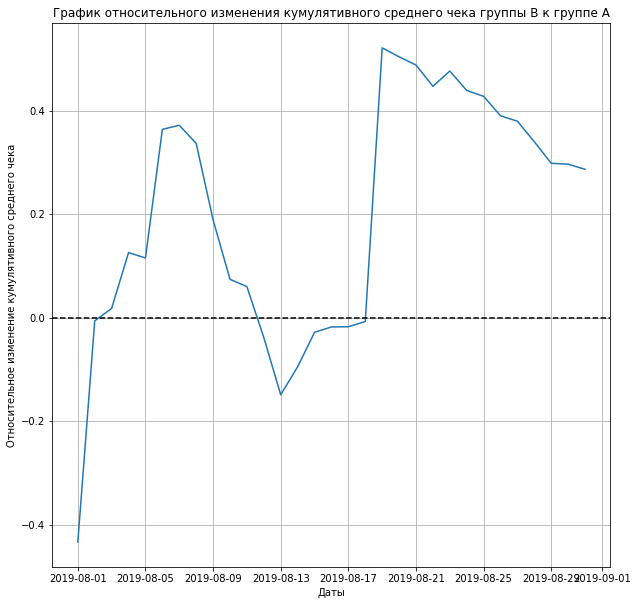

In [81]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Относительное изменение кумулятивного среднего чека')
plt.grid()
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid();

На большей части графика средний чек по группе B выше, чем по группе A. До 18 августа они были практически наравне, но потом произошел резкий скачок у группы B.  
В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы!

3.2.5. Построим график кумулятивной конверсии по группам:  

Зададим масштаб осей методом plt.axis().

In [82]:
display(orders.sort_values(by = 'date', ascending = True).head(2))

,orderId,userId,date,revenue,group
103,2951399376,2019355024,2019-08-01,2550,B
148,4238948438,363280180,2019-08-01,300,B


In [83]:
display(orders.sort_values(by = 'date', ascending = True).tail(2))

,orderId,userId,date,revenue,group
1022,2411823395,3788724847,2019-08-31,2610,A
997,1941116644,2373765141,2019-08-31,14250,B


Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-07-31", '2019-09-01', 0, 0.015]

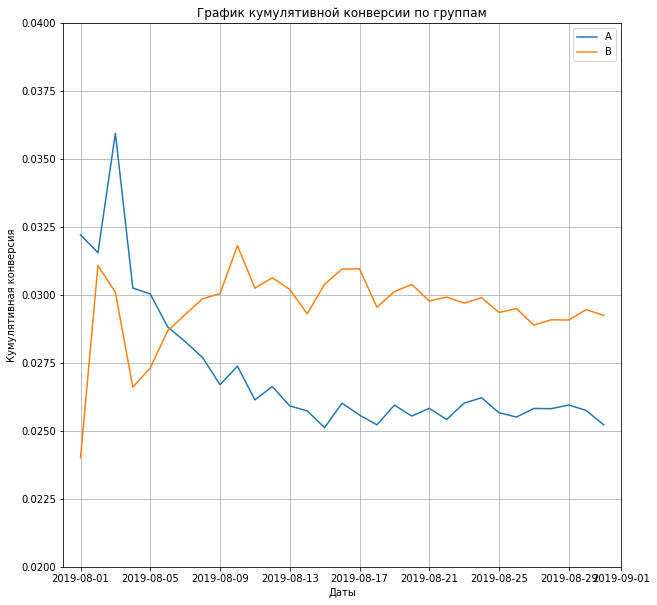

In [84]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Даты')
plt.ylabel('Кумулятивная конверсия')
plt.legend();
# задаем масштаб осей
plt.axis(["2019-07-31", '2019-09-01', 0.02, 0.04]);

По графику накопительная конверсия по группе B практически на всем протяжении лежит значительно выше накопительной конверсии группы A.

3.2.6. Построим график относительного изменения кумулятивной конверсии группы B к группе A:  

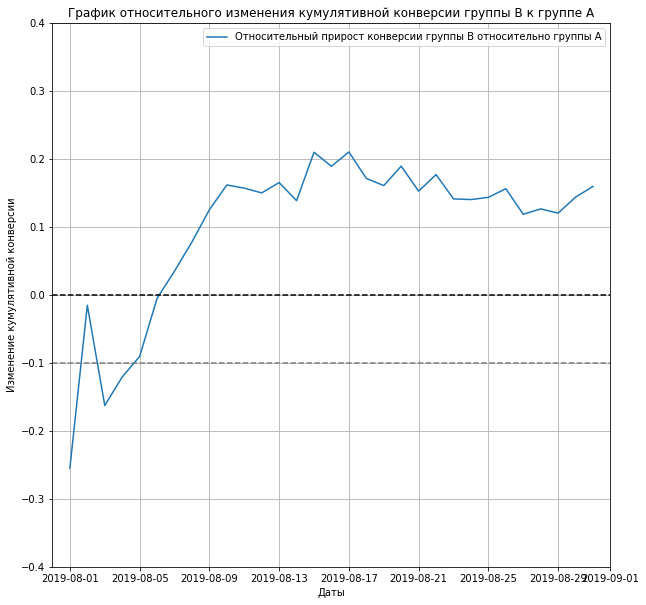

In [85]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 10))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Изменение кумулятивной конверсии')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-07-31", '2019-09-01', -0.4, 0.4]);

В начале теста группа B проигрывала группе A, затем вырвалась вперёд и стабилизировалась.  

3.2.7. Построим точечный график количества заказов по пользователям:  

Перемеименуем датафрейм:  

In [86]:
data = orders

In [87]:
display(data.head(10))

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B
10,3649131742,879864040,2019-08-15,4008,A


In [88]:
ordersByUsers = data.drop(['group', 'revenue', 'date'], axis=1).groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

         userId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


In [89]:
print('Максимальное количество заказов:', ordersByUsers['orders'].max())

Максимальное количество заказов: 3


In [90]:
print(ordersByUsers.sort_values(by='orders',ascending=False).tail(5))

         userId  orders
331  1438226485  1     
332  1452540367  1     
333  1455323168  1     
334  1455861274  1     
972  4283872382  1     


Есть пользователи, которые совершали 3 и 2 заказа. А внизу пользователи, совершившие по 1 заказу.   

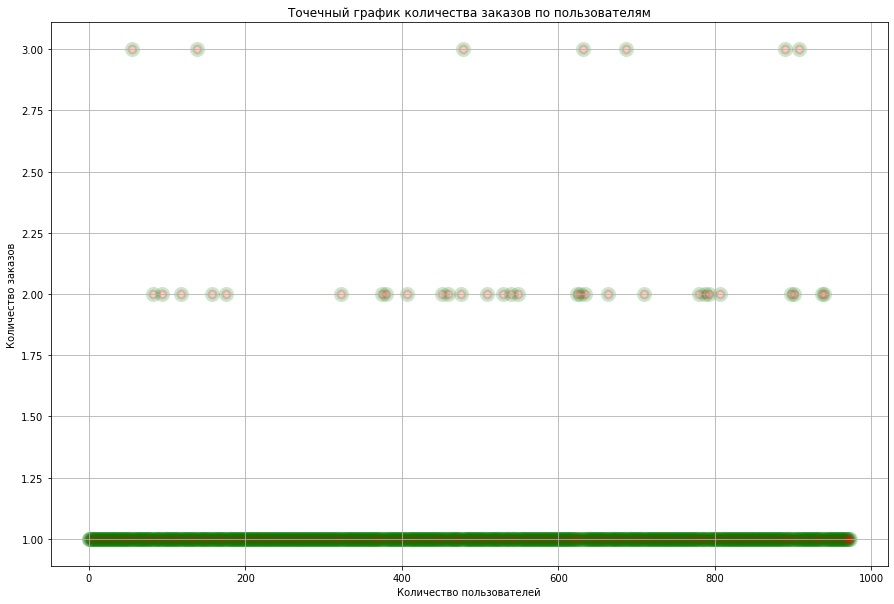

In [91]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15, 10))
plt.scatter(x_values, ordersByUsers['orders'], s = 100, color =  'red', linewidths = 5, alpha = 0.2, edgecolors="g")
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.grid(True);

Видно, что пользователей, совершивших более 3 заказов, исчезающе мало, однако график не наглядный, посмотрю поближе:  

In [92]:
ordersByUsers_see = ordersByUsers.loc[(ordersByUsers['orders'] < 3)]

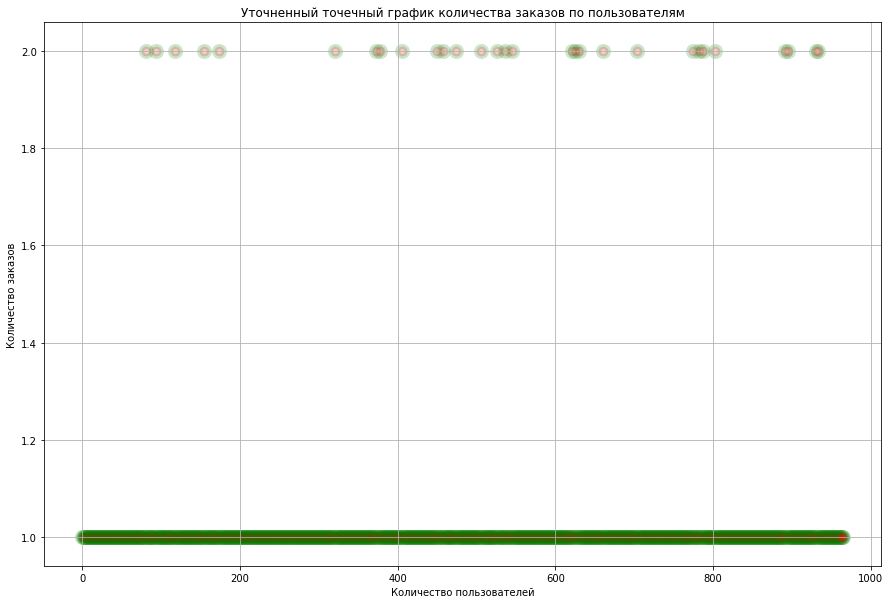

In [93]:
x_values = pd.Series(range(0, len(ordersByUsers_see)))
plt.figure(figsize=(15, 10))
plt.scatter(x_values, ordersByUsers_see['orders'], s = 100, color =  'red', linewidths = 5, alpha = 0.2, edgecolors="g")
plt.title('Уточненный точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.grid(True);

Большая часть клиентов сделали по 1 заказу.  

3.2.8. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.  
Выберем границу для определения аномальных пользователей.  

In [94]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей оформляли больше чем 1 заказ.  

Разумно выбрать 1 заказ на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.  

3.2.9 Построим точечный график стоимостей заказов:  

Как мы помним из датафрейма:  

Среди первых 10 строк цены заказов находятся в диапазоне от 730 до 13 170 рублей.  

Средняя сумма заказа 8300 рублей, наиболее часто встречающася сумма заказа (мода) 990 рублей.  

Обнаружился заказ на сумму 1 294 500 рублей!  
Если такой дорогой заказ попадёт в одну из групп теста, он сразу же исказит результаты и сделает победителем ту группу, где оказался. При этом такие покупки — редкость, исключение, которое проявилось не из-за тестирования гипотезы, а случайно.

In [95]:
print('Максимальная сумма заказа:', data['revenue'].max())
print('Средняя сумма заказа:', data['revenue'].mean())
print('Наиболее часто встречающася сумма заказа(мода):', data['revenue'].mode())

Максимальная сумма заказа: 1294500
Средняя сумма заказа: 8300.814960629921
Наиболее часто встречающася сумма заказа(мода): 0    990
dtype: int64


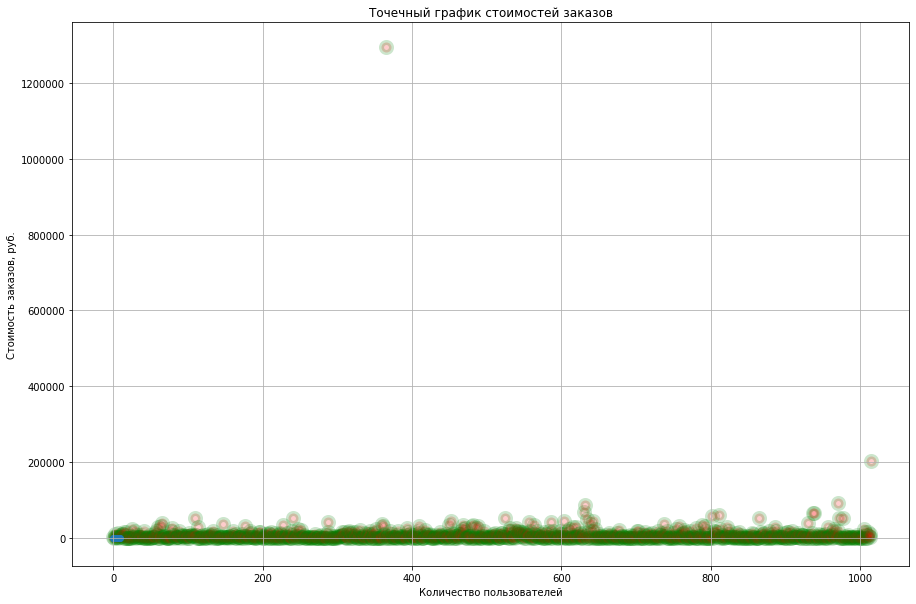

In [96]:
x_values = pd.Series(range(0,len(data['revenue'])))
plt.figure(figsize=(15, 10))
plt.scatter(x_values, data['revenue'], s = 100, color =  'red', linewidths = 5, alpha = 0.2, edgecolors="g")
plt.scatter(range(0,10), range(0,10))
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов, руб.')
plt.grid(True);

Из графика видно, что очень дорогих заказов исчеазюще мало, однако график не наглядный, посмотрю поближе:  

In [97]:
orders_see = data.loc[(data['revenue'] < 60000)]

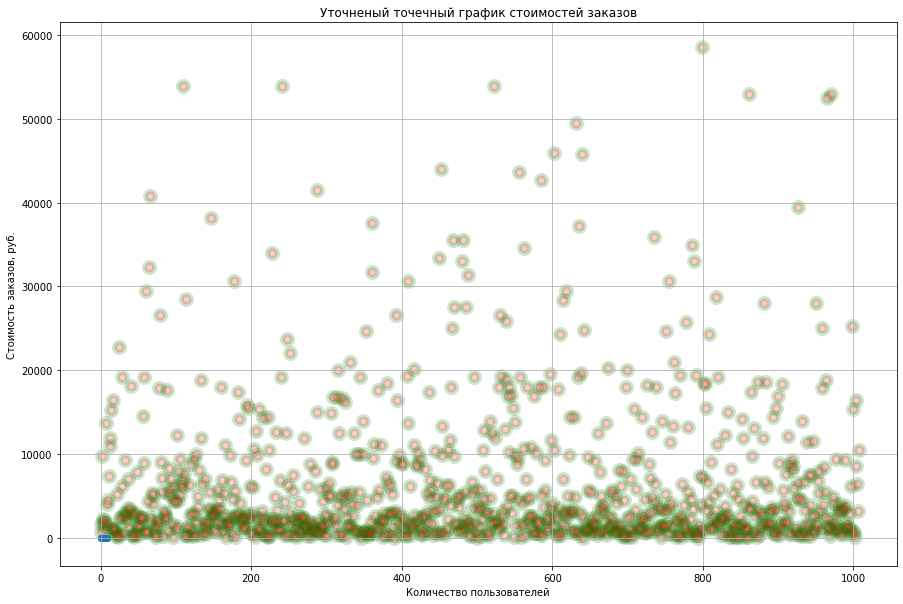

In [98]:
x_values = pd.Series(range(0,len(orders_see['revenue'])))
plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders_see['revenue'], s = 100, color =  'red', linewidths = 5, alpha = 0.2, edgecolors="g")
plt.scatter(range(0,10), range(0,10))
plt.title('Уточненый точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов, руб.')
plt.grid(True);

Теперь видно, что аномальные заказы начинается с суммы более 20000.  
Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.  

3.2.10. Посчитаем 95-й и 99-й перцентили стоимости заказов, выберем границу для определения аномальных заказов:  

In [99]:
print(np.percentile(data['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% заказов дороже 26785 рублей и не более 1% дороже 53904 рублей.

3.2.11. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным:  

Напечатаю датафреймы, чтобы перед глазамии было название столбцов:  

In [100]:
display(orders.head(2))

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [101]:
display(visitors.head(2))

,date,group,visitors
0,2019-08-01,A,714
1,2019-08-02,A,617


In [102]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'orderId', 'userId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'orderId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,714,708,714,708
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,617,579,1331,1287
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,505,507,1836,1794
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,709,762,2545,2556
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,751,702,3296,3258


Названия столбцов в новом датафрейме:  
- date — дата;  
- ordersPerDateA — количество заказов в выбранную дату в группе A;  
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;  
- ordersPerDateB — количество заказов в выбранную дату в группе B;  
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;  
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;  
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;  
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;  
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;  
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;  
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;  
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;   
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.  

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.  

In [103]:
ordersByUsersA = orders[orders['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.  
Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни. 

Переменная sampleA должна состоять из двух частей:  

Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders']. Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах:  

data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). Создадим объект pd.Series нужной длины:

In [104]:
display(pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders').head())

0    0
1    0
2    0
3    0
4    0
Name: orders, dtype: int64

Объединим последовательности функцией pd.concat(). Сперва ей передадим то, что объединяют — в нашем случае список из первой и второй части:  

In [105]:
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

[0      1
 1      1
 2      1
 3      1
 4      1
       ..
 440    1
 441    1
 442    1
 443    1
 444    1
 Name: orders, Length: 445, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 18105    0
 18106    0
 18107    0
 18108    0
 18109    0
 Name: orders, Length: 18110, dtype: int64]

Дальше передадим аргумент, сообщающий, что объекты Series нужно объединить по строкам (то есть записать подряд): pd.concat([...], axis=0). То же делаем для sampleB и получаем:

In [106]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

В sampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().  
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.  

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.  

In [107]:
ordersByUsersA = orders[orders['group']=='A'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('userId', as_index=False).agg({'orderId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.006
0.160


Значение p-value 0.006, значительно менье, чем 0,05, значит, даже по «сырым» данным существует различие в конверсии групп A и B.  
Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.  
Относительный проигрыш группы А равен 16.0%.  

3.2.12.	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:  

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов.  

In [108]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.415
0.287


Значение p-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы A значительно ниже среднего чека группы B.  

3.2.13. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:  

Ранее, найденные 95-й и 99-й перцентили средних чеков равны 26785.0 и 53904.0 рублей.  

А 95-й и 99-й перцентили количества заказов на одного пользователя равны 1 и 2 заказа на пользователя.  

Примем за аномальных пользователей тех, кто совершил больше 1 заказа или совершил заказ дороже 27 000 рублей.  

Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.  

Сделаем срезы пользователей с числом заказов больше 1 — usersWithManyOrders и пользователей, совершивших заказы дороже 27 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.  
#IMHO - полагаю, можно было бы взять еще меньшее значение, исходя из того, что мода равна 990 рублей, а средняя сумма 8300 рублей, но со статистикой не поспоришь.  

Узнаем, сколько всего аномальных пользователей методом shape().  

In [109]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 27000]['userId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: userId, dtype: int64
(86,)


86 аномальных пользователей.  

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:  

In [110]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам:  

In [111]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.008
0.174


Результаты по конверсии, немного, но, заметно, изменились. 

3.2.14. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:  

In [112]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['userId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.364
-0.034


Результаты по среднему чеку по очищенным данным, поменялись кардинально.  
Если по "сырым" данным, значение p-value было 0.415, то по очищенным данным, p-value снизился до 0.364.  
Наиболее заметна стала разница между средними чеками, если по "сырым" данным разица была 0.174, то по очищенным данным, разница стала -3%.  

Общий вывод по Части 3 "Анализ A/B-теста":  

В процессе работы по Части 3 "Анализ A/B-теста", было сделано:

- предообработка данных - проверка на корректность, пользователи, попавшие в обе группы были удалены,    

- построенно несколько графиков:  

  - график кумулятивной выручки по группам, как видно из графика кумулятивная выручка группы В, больше, ченм группы А,  
  - график кумулятивного среднего чека по группам, также показал, что средний чек группы В, больше, ченм группы А,
  - график относительного изменения кумулятивного среднего чека группы B к группе A, тоже показал лучшие результаты группы В,  
  - график кумулятивной конверсии по группам, в группе В, также оказался лучше, чем в групппе А,  
  - график относительного изменения кумулятивной конверсии группы B к группе A, также выше, у группы В,  
  - точечный график количества заказов по пользователям, который показа, что в основном пользователи совершают не более 1 заказа,  
  - точечный график стоимостей заказов, показал, что аномальные заказы начинаются от сумм 20 000 рублей,  
  
- рассчитаны:  

  - 95-й и 99-й перцентили количества заказов на пользователя, выяснилось, что выводы, сделанные на основании графиков, оказались верными - 95% пользователей, совершает не более 1 заказа,  
  - 95-й и 99-й перцентили стоимости заказов показали, что 95% заказов составляют сумму до 27 000 рублей (округленно),  
  - статистическая значимость различий в конверсии между группами по «сырым» данным, показала, что существует различие в конверсии групп A и B, в группе В она выше,  
  - статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным, показала, что существует различие в конверсии групп A и B, в группе В она выше,  
  - статистическая значимость различий в конверсии между группами по «очищенным» данным, также показало лидерство группы В,  
  - статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным, аналогично.  

4. Общий вывод:  

В работу пришли 3 датафрейма:  

- Hypothesis, содержащий данные о гипотезах,  
- Orders, содержащий данные о покупках,  
- Visitors, содержащий данные по посещениях.  

Внешне датафреймы выглядели качественными, необходимо было, только преобразовать формат даты, пропусков, дубликатов не было.  

Анализ гипотез:  

При анализе гипотез, параметр метода RICE - Reach (охват), изменил всю приоритетность, полученную по методу ICE. Возможно следовало бы сгенерировать максимум гипотез, приоритезировать их методом ICE, а затем, оставшиеся приоритезироовать методом RICE.  

Анализ А/В теста:  

Для очистки совести, датафреймы Orders и Visitors были поверены на корректность выгрузки. 

Сначала посмотрели на датафреймы "глазами" и действительно нашлось 5 пользователей, попавших в обе группы тестирования, дальнейший анализ кодом показал, что, делать выводы на основании просмотра данных, было суровой ошибкой.  

Таких пользователей оказалось 58.  

Они были удалены из датафрейма Orders и данные об их посещениях удалены из датафрейма Visitors.  

На этом предообработка данных была завершена.  

Было построено большое количество графиков и рассчитаны показателей.  

Выяснилось, что большинство пользователей совершают не более 1 транзакции, 95% пользователей покупают на сумму менее 27 тыс. руб. (округленно), в связи с этим, аномальные пользователи были удалены. Таких пользователей оказалось 86.  

По ходу выполнения проекта, посетил инсайт, о том, что, неплохо было бы и поисследовать этих "белых лебедей" - пользователей, совершающих большее количество заказов, покупающих на большие суммы. Кто они? Почму покупают у нас? Как часто они это делают на горизонте месяца, квартала, года?  

Все графики и расчеты показали преимущества группы В перед группой А, подробный вывод по ним в  - "Общий вывод по Части 3 "Анализ A/B-теста".   

Общий вывод по тесту:  

Тест можно остановить и считать успешно проведенным. Конверсия из пользователя в покупателя у группы B значимо выше, чем у группы A, заметно лучше и результаты по среднему чеку.